In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 854.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
# ! pip install -q onnxruntime onnx==1.10.0 onnxruntime-gpu onnxruntime_tools

In [ ]:
# ! pip install -q onnx==1.10.0
! pip install -q onnxruntime onnxruntime-gpu onnxruntime_tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from tqdm.notebook import tqdm
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
%cd /content/drive/MyDrive/project_3

/content/drive/MyDrive/project_3


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_3/movie_tvshow_description.csv")
image=np.array(Image.open("/content/drive/MyDrive/project_3/twitter.png"))

In [ ]:
df.head()

,url,description,genres,title
0,https://www.metacritic.com/movie/the-informer/,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"['Action', 'Crime', 'Drama', 'Thriller', '', '', '', '', 'Action', 'Crime', 'Drama', 'Thriller']","7,921. The Informer\nNOV 6, 2020  \nHonorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The General, the most powerful crime boss in New York. But when the FBI sting meant to finally earn Koslow his freedom results in the death of an undercover NYPD cop, Koslow finds himself caught in the crossfire between the mob ..."
1,https://www.metacritic.com/movie/reign-over-me/,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...","['Drama', '', 'Drama']","7,922.\nMAR 23, 2007\nFormer college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his beautiful wife, children and career is overwhelmed by his responsibilities. Their rekindled relationship becomes a lifeline for the two men, who are both in need of a trusted friend at this pivotal moment in their lives. (Columbia Pictur..."
2,https://www.metacritic.com/movie/triple-frontier/,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","['Action', 'Thriller', '', '', 'Action', 'Thriller']","7,923.\nMAR 6, 2019  \nA group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But when events take an unexpected turn and threaten to spiral out of control, their skills, their loyalties and their morals are pushed to a breaking point in an epic battle for survival.\n61"
3,https://www.metacritic.com/movie/somewhere-in-queens/,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","['Comedy', 'Drama', 'Sport', '', '', '', 'Comedy', 'Drama', 'Sport']","7,924.\nAPR 21, 2023  \nLeo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son Sticks (Jacob Ward), and Leos close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and younger brother 

In [ ]:
df["genres"] = df["genres"].apply(lambda x: [genre.strip() for genre in ast.literal_eval(x) if genre.strip()])
# This removes empty strings from each list in the "genres" column

In [ ]:
df['genres'] = df['genres'].apply(lambda x: list(set(x)))

In [ ]:
df.shape

(21869, 4)

In [ ]:
df.isnull().sum()

url            0
description    0
genres         0
title          0
dtype: int64

In [ ]:
df.drop(columns=["url","title"],axis=1,inplace=True)

In [ ]:
df.head()

,description,genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Action, Thriller, Drama, Crime]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Action, Thriller]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Sport, Drama, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Mystery, Biography, Drama, Crime, Documentary]"


In [ ]:
df["genres"].value_counts()

[Drama]                                           1728
[Documentary]                                     1286
[Comedy]                                          1144
[Drama, Comedy]                                    940
[Romance, Drama, Comedy]                           714
                                                  ... 
[Action, Mystery, Thriller, Documentary]             1
[Fantasy, Comedy, History, Drama, Documentary]       1
[Mystery, Biography, Drama, Adventure]               1
[Comedy, Adventure, Western, History, Drama]         1
[Action, Drama, Adventure, Crime]                    1
Name: genres, Length: 2250, dtype: int64

In [ ]:
# genre_count = [g for gen in df["genres"] for g in gen]
# genre_series = pd.Series(genre_count)
# genre_counts = genre_series.value_counts()
# plt.figure(figsize=(12, 6))
# sns.countplot(x=genre_series, order=genre_counts.index, palette="hsv")
# plt.xticks(rotation=45, ha="right")  #
# plt.xlabel("Genres")
# plt.ylabel("Count")
# plt.title("Distribution of Genres")
# plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# all_text=" ".join(df['description'].values.tolist())
# wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='aqua', max_words=800,colormap="bwr",mask=image).generate(all_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# df["new_genres"] = df["genres"].apply(lambda x: ' '.join([genre.strip() for genre in x if genre.strip()]))
# all_text = " ".join(df['new_genres'].values.tolist())
# wordcloud = WordCloud(width=800, height=800, stopwords=STOPWORDS,mask=image, background_color='black', max_words=800, colormap="cool").generate(all_text)
# plt.figure(figsize=(10, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


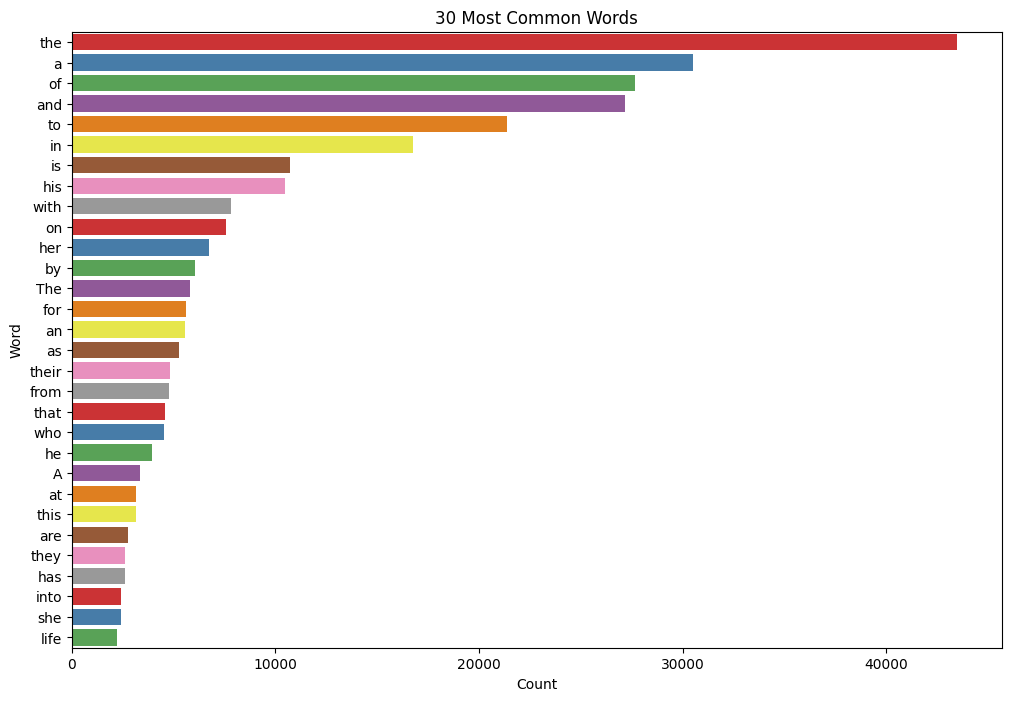

In [ ]:
from collections import Counter
data_set = df["description"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
# df.drop(columns=["new_genres"],axis=1,inplace=True)

In [ ]:
df.head()

,description,genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Action, Thriller, Drama, Crime]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Action, Thriller]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Sport, Drama, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Mystery, Biography, Drama, Crime, Documentary]"


In [ ]:
type(df["genres"])

pandas.core.series.Series

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 27
{'Action': 2987, 'Thriller': 4462, 'Drama': 11649, 'Crime': 3370, 'Sport': 687, 'Comedy': 7180, 'Mystery': 2469, 'Biography': 1661, 'Documentary': 3044, 'Sci-Fi': 1818, 'Romance': 3737, 'Western': 275, 'Fantasy': 1838, 'Horror': 1721, 'Animation': 1071, 'Adventure': 2479, 'Family': 1602, 'Film-Noir': 40, 'History': 1241, 'War': 758, 'Musical': 484, 'Music': 1169, 'News': 102, 'Unknown': 106, 'Talk-Show': 162, 'Reality-TV': 1024, 'Game-Show': 297}


In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
print("Length of rare genres :",len(rare_genres))
print(f"Rare genres are : {rare_genres}")

Length of rare genres : 4
Rare genres are : ['Film-Noir', 'News', 'Unknown', 'Talk-Show']


In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = genres
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(21753, 2)

In [ ]:
df['revised_genres'] = revised_genre_list
df.head()

,description,genres,revised_genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Action, Thriller, Drama, Crime]","[Action, Thriller, Drama, Crime]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama],[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Action, Thriller]","[Action, Thriller]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Sport, Drama, Comedy]","[Sport, Drama, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Mystery, Biography, Drama, Crime, Documentary]","[Mystery, Biography, Drama, Crime, Documentary]"


In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 23
{'Action': 2987, 'Thriller': 4462, 'Drama': 11649, 'Crime': 3370, 'Sport': 687, 'Comedy': 7180, 'Mystery': 2469, 'Biography': 1661, 'Documentary': 3044, 'Sci-Fi': 1818, 'Romance': 3737, 'Western': 275, 'Fantasy': 1838, 'Horror': 1721, 'Animation': 1071, 'Adventure': 2479, 'Family': 1602, 'History': 1241, 'War': 758, 'Musical': 484, 'Music': 1169, 'Reality-TV': 1024, 'Game-Show': 297}


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
encode_genre_types

{'Action': 0,
 'Thriller': 1,
 'Drama': 2,
 'Crime': 3,
 'Sport': 4,
 'Comedy': 5,
 'Mystery': 6,
 'Biography': 7,
 'Documentary': 8,
 'Sci-Fi': 9,
 'Romance': 10,
 'Western': 11,
 'Fantasy': 12,
 'Horror': 13,
 'Animation': 14,
 'Adventure': 15,
 'Family': 16,
 'History': 17,
 'War': 18,
 'Musical': 19,
 'Music': 20,
 'Reality-TV': 21,
 'Game-Show': 22}

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[10][: 30]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,description,genres,revised_genres,genre_cat_list
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Action, Thriller, Drama, Crime]","[Action, Thriller, Drama, Crime]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama],[Drama],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Action, Thriller]","[Action, Thriller]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Sport, Drama, Comedy]","[Sport, Drama, Comedy]","[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Mystery, Biography, Drama, Crime, Documentary]","[Mystery, Biography, Drama, Crime, Documentary]","[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# DataLoaders__And__Modeling

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
len(labels)

23

In [ ]:
labels

['Action',
 'Thriller',
 'Drama',
 'Crime',
 'Sport',
 'Comedy',
 'Mystery',
 'Biography',
 'Documentary',
 'Sci-Fi',
 'Romance',
 'Western',
 'Fantasy',
 'Horror',
 'Animation',
 'Adventure',
 'Family',
 'History',
 'War',
 'Musical',
 'Music',
 'Reality-TV',
 'Game-Show']

# Data Split


In [ ]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(19578, 2175)

In [ ]:
valid_df = df.loc[valid_ids]
valid_df.head()

,description,genres,revised_genres,genre_cat_list
3192,"In Walk Away Renee, Caouette embarks on a road trip to move his mentally ill mother Renee across the country. As they encounter roadblocks in the present, we begin to flash back to moments from the past, giving us insight into this anything-but-ordinary mother/son relationship. Through musical montage, psychedelic sequences and real and ...","[Drama, Documentary]","[Drama, Documentary]","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
15012,"When salesman-turned-pastor Michael Spurlock (John Corbett) is ordered to shut down a tiny church, a group of refugees from Southeast Asia appear at the right moment in Spurlock’s life, and together they risk everything to plant seeds of hope for the future. Based on a true story.",[Drama],[Drama],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
15150,"On Erin Island, an idyllic fishing village off the coast of Ireland, charming but somewhat work-shy Ciaran O’Shea, is tasked with greeting Lisa Nolan, a straight-laced young officer who has arrived from the mainland. Not that there is much for them to do, aside from dealing with the occasional drunk, and that’s usually O’Shea himself. Bu...","[Thriller, Horror, Comedy, Adventure, Action, Sci-Fi]","[Thriller, Horror, Comedy, Adventure, Action, Sci-Fi]","[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
17917,"The three-part miniseries about the formation, and subsequent break-ups, careers post-break-ups, and reunions of the 1980 R&B boy band that included Michael Bivins (Bryshere Y. Gray), Ricky Bell (Caleb McLaughlin), Bobby Brown (Woody McClain), Ronnie Devoe (Keith Powers), Raplph Tresvant (Algee Smith), and Johnny Gill (Luke James).","[Biography, Drama, Music]","[Biography, Drama, Music]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
6833,"When New York's hottest nightclub deejay Darrell (Usher) saves a mob boss's life (Palminteri), he is rewarded for his bravery with the job of watching over the Don's beautiful daughter Dolly (Chriqui). (Lions Gate Films)","[Comedy, Music, Romance, Drama, Crime]","[Comedy, Music, Romance, Drama, Crime]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


### We will be using valid_df for all inference testing

# Fastai & Blurr Inference

In [ ]:
model_path = "models/movie_tvshow_classifier_0.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

[{'labels': ['Sci-Fi'],
  'scores': [0.6059932112693787],
  'class_indices': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['Crime', 'Thriller', 'Action', 'Drama', 'Sport', 'Comedy', 'Biography', 'Documentary', 'Mystery', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Fantasy', 'Family', 'Adventure', 'Animation', 'History', 'War', 'Musical', 'Music', 'Reality-TV', 'Game-Show'],
  'probs': [0.03625717759132385,
   0.20176373422145844,
   0.16050221025943756,
   0.37380149960517883,
   0.002020840300247073,
   0.39444515109062195,
   0.006672372110188007,
   0.015801934525370598,
   0.075321726500988,
   0.6059932112693787,
   0.032898228615522385,
   0.002262585097923875,
   0.15990595519542694,
   0.02131727896630764,
   0.0581628680229187,
   0.04686847701668739,
   0.1206471249461174,
   0.003423950169235468,
   0.004129857290536165,
   0.03981640934944153,
   0.0654999315738678,


In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

['Sci-Fi']

In [ ]:
from sklearn import metrics

def metric_measures(test_df, preds):

  targets = [np.asarray(target) for target in test_df['genre_cat_list'].to_list()]
  outputs = [np.asarray(pred) for pred in preds]


  accuracy = metrics.accuracy_score(targets, outputs)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

  print(f"F1 Score (Micro) = {f1_score_micro}")
  print(f"F1 Score (Macro) = {f1_score_macro}")

  return

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['description']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

preds[0][:20]

  0%|          | 0/2175 [00:00<?, ?it/s]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.6690522243713733
F1 Score (Macro) = 0.605881839596994


# Convert to ONNX

**ONNX, short for Open Neural Network Exchange, is a freely available format specifically designed for deep learning models. Its primary purpose is to facilitate seamless exchange and sharing of models across different deep learning frameworks, including TensorFlow and Caffe2, when used alongside PyTorch.**

**One of the notable advantages of ONNX is its ability to transfer models between diverse frameworks with minimal preparation and without the need for rewriting the models. This feature greatly simplifies model optimization and acceleration on various hardware platforms, such as GPUs and TPUs. Additionally, it allows researchers to share their models in a standardized format, promoting collaboration and reproducibility.**

**To support efficient working with ONNX models, several helpful tools are provided by ONNX. For instance, ONNX Runtime serves as a high-performance engine for executing models. Furthermore, the ONNX converter facilitates seamless model conversion across different frameworks.**

In [ ]:
model_path = "models/movie_tvshow_classifier_0.pkl"
learner_inf = load_learner(model_path)

In [ ]:
classifier = learner_inf.model.hf_model.eval()
torch.onnx.export(classifier,torch.LongTensor([[0] * 512]),
    'models/genres-classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}})

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType
onnx_model_path = 'models/genres-classifier.onnx'
quantized_onnx_model_path = 'models/genres-classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)

Ignore MatMul due to non constant B: /[/roberta/encoder/layer.0/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.0/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.1/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.1/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.2/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.2/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.3/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.3/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.4/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.4/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.5/attention/self/MatMul]
Ignore MatMul due to non constant

# ONNX Inference

# Normal ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

class_labels = list(encode_genre_types.keys())

inf_session = rt.InferenceSession('models/genres-classifier.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/2175 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.4046767803652526
F1 Score (Macro) = 0.43810387726170474


# Quantized ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

class_labels = list(encode_genre_types.keys())

inf_session = rt.InferenceSession('models/genres-classifier-quantized.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/2175 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.39426173514199275
F1 Score (Macro) = 0.4227048041646749
